<a href="https://colab.research.google.com/github/Niru27405/handwritten-digit-recognition/blob/main/Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape to include channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels (for 10 output classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8716 - loss: 0.4207 - val_accuracy: 0.9793 - val_loss: 0.0715
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.9811 - loss: 0.0621 - val_accuracy: 0.9873 - val_loss: 0.0411
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.9879 - loss: 0.0395 - val_accuracy: 0.9893 - val_loss: 0.0388
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9916 - loss: 0.0277 - val_accuracy: 0.9905 - val_loss: 0.0358
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9893 - val_loss: 0.0384


In [ ]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9855 - loss: 0.0421

Test Accuracy: 0.9888


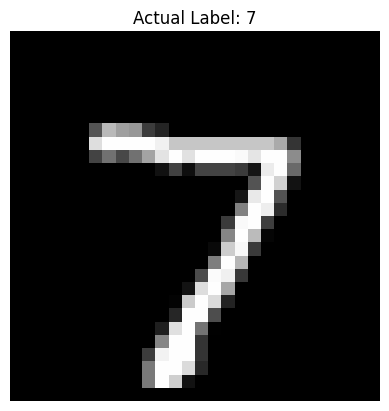

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Label: 7


In [ ]:
# Predict and display one image
index = 0  # Change index to test other samples
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Actual Label: {np.argmax(y_test[index])}")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(x_test[index], axis=0))
print(f"Predicted Label: {np.argmax(prediction)}")
